In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

In [66]:
%config InlineBackend.figure_format = 'svg'

In [67]:
df = pd.read_csv('../files/data/douyin.csv', encoding = 'utf-8')
df

,name,gender,country,province,city,location,category,fans,videos,likes,comments,shares,following,school,custom_verify,enterprise_verify,signature
0,人民日报,0,中国,北京,北京,北京,政企,117259000,2427,1165446000,11906782048,9089061412,18,NaN,NaN,人民日报官方账号,参与、沟通、记录时代。
1,央视新闻,0,中国,北京,北京,北京,政企,105648000,3681,3814571666,2603872833,1989050522,27,NaN,央视新闻官方账号,央视新闻官方抖音号,本宝宝暂时还没想到个性签名
2,陈赫,1,中国,NaN,上海,上海,明星,68374000,422,570096000,430908721,117639297,131,上海戏剧学院,演员陈赫,NaN,😎帅到没朋友 💁🏻‍♂️有东西直播间 🔜1⃣️1⃣️1⃣️8⃣️🕔 ☑️公众号➰[陈赫]
3,Dear-迪丽热巴,0,NaN,NaN,NaN,NaN,明星,49790000,29,181167000,202448645,151645265,0,NaN,演员,NaN,NaN
4,毒舌电影,1,中国,广东,广州,广州,剧情,46355000,616,820393000,28026109,13005392,24,NaN,优质影视自媒体、抖音影评团成员,NaN,看电影， 可以改变人生。 商务邮：dsmovie@youhaoxi.cn ❤️ 日历预售...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,阿李游戏解说,1,中国,NaN,上海,上海,美女,1472000,276,15776000,53585217,17502825,54,NaN,游戏领域创作者,NaN,❤️直播通知群:518780133 ❤️粉丝水友群:933644308 ❤️狼人杀开黑:7...
5021,李泳希,2,中国,广东,广州,广州,音乐,1472000,335,7085000,52841376,37772319,163,NaN,抖音音乐人,NaN,希望我的歌声能给你带来温暖啦～ 翻唱音频：🐧音乐 全民🎤歌 李泳希 每晚10：30直播间不见...
5022,长河,1,NaN,NaN,NaN,NaN,美女,1472000,19,8622000,25566261,1760166,10,清华大学,NaN,NaN,我希望有一天 我的小号，能成为我的大号
5023,悦艺说,2,中国,吉林,延边,延边,美女,1472000,207,4492000,13951772,153630035,78,NaN,NaN,NaN,视频文稿在上方🔝商品橱窗实用话语大全里面 电子书买完手机直接观看，无邮寄 找到订单立即体验即可


字段说明：

gender          性别

country         国籍

province        省份

city            城市

category        类别

fans            粉丝数

videos          视频数

likes           点赞数

comments        评论数

shares          分享数

school          学校

custom_verify   认证

signature       个性签名

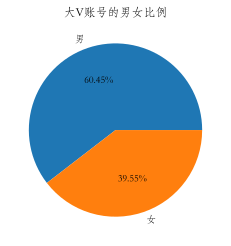

In [70]:
# 1. 大V账号的男女比例（饼图）。
temp = df[['gender','custom_verify']].dropna()
temp = temp[~((temp['gender'] == '未知') | (temp['gender'] == '0'))]
temp = temp.groupby('gender').count()
labels = ['男','女']
plt.pie(temp['custom_verify'],labels = labels, autopct = '%.2f%%')
plt.title('大V账号的男女比例')
plt.show()

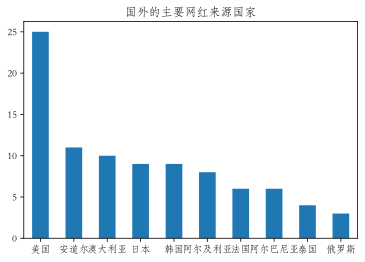

In [84]:
# 2. 国外的主要网红来源有哪些国家。
def handle_country(country):
    if country in ['China','香港','Hong Kong']:
        return '中国'
    elif country == 'United States':
        return '美国'
    elif country == '大韩民国':
        return '韩国'
    else:
        return country
    
# 将国籍相同不同名称设为一致
df['country'] = df['country'].apply(handle_country)
# 去除空值
temp = df['country'].dropna()
# 计数
temp = temp.value_counts()
temp[2:12].plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('国外的主要网红来源国家')
plt.show()

In [6]:
# 3. 国内的网红主要分布的省份、城市。
temp = df[df['country'] == '中国']
pd.pivot_table(data = temp,
              index = 'province',
              columns = 'city',
               values = 'name',
              aggfunc = 'count')

city,Cebu City,Changchun,Guangyuan,Guangzhou,Wuhan,Xi'an,七台河,三亚,三亚市,三明,...,鹤壁,鹤壁市,黄山,黑河,黔东南,黔南,黔南布依族苗族自治州,黔西南,齐齐哈尔,龙岩
province,,,,,,,,,,,,,,,,,,,,,
Guangdong,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hubei,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jilin,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shaanxi,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sichuan,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
青海,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
青海省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
香港,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


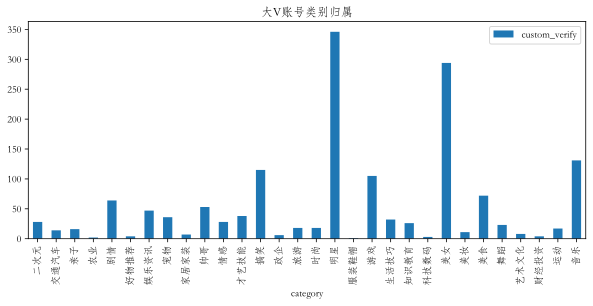

In [87]:
# 4. 大V账号类别归属。
temp = df[['category','custom_verify']].dropna()
temp = temp.groupby('category').count()
# temp = temp.sort_values(by = 'custom_verify',ascending = False)
temp.plot(kind ='bar' ,figsize = (10,4))
plt.title('大V账号类别归属')
plt.show()

In [8]:
# 5. 发布视频/获得点赞/获得评论/获得分享最多的账号（Top10）。
# 发布视频top10
temp = df['videos'].nlargest(10).index
df.loc[temp]

,name,gender,country,province,city,location,category,fans,videos,likes,comments,shares,following,school,custom_verify,enterprise_verify,signature
359,南阳网,1,中国,河南省,南阳市,南阳市,政企,10550000,16000,326477000,545282951,634520666,406,NaN,NaN,南阳网官方抖音号,关注社会事，弘扬正能量。 欢迎投稿，邮箱：nyw0377@163.com VX: nyw...
797,乔乔好物,1,中国,河南,郑州,郑州,生活技巧,6885000,16000,36851000,1098477,1879388,4,北京大学,NaN,NaN,我是乔乔，酷爱尝试各种新奇特小家居！超爱买买买～每天都会直播！给粉丝们推荐我亲测优选的小玩意儿～
577,小丸子,2,中国,广东,深圳,深圳,好物推荐,7980000,13000,53377000,14347758,27535224,139,澳门科技大学,NaN,NaN,我是甜古古酷爱尝试各种新奇特小家居！超爱买买买～每天都会直播！给粉丝们推荐我亲测优选的小玩意儿～
1044,小香草,2,中国,浙江,杭州,杭州,好物推荐,6020000,13000,28868000,5855962,16516979,967,NaN,NaN,NaN,我是小月季，酷爱尝试各种新奇特小家居！超爱买买买～每天都会直播！给粉丝们推荐我亲测优选的小玩意儿～
2417,广州ing,1,中国,广东,广州,广州,娱乐资讯,3488000,13000,208732000,574045191,377311500,163,NaN,NaN,广州广播电视台综合频道,“美好生活 广视精选”周二四六日直播 购物请关注V公众号:美好生活V 爆料邮箱1556446...
2186,法直播,1,中国,河南,郑州,郑州,政企,3681000,12000,175777000,882297645,319952260,98,NaN,NaN,河南法制报官方账号,见证法制进程 建设法治中原
4806,四姐,2,暂不设置,NaN,NaN,盐城,美女,1492000,12000,10656000,13797715,7823841,4809,NaN,NaN,NaN,NaN
516,看常州,2,埃塞俄比亚,NaN,NaN,NaN,政企,8464000,11000,428208000,27058961,19833007,172,NaN,NaN,常州广播电视台官方抖音号,常州广播电视台新媒体中心 爆料、投稿、奖励、客服及商务合作VX： kcz0519、kcz00...
1367,小甜心,2,中国,浙江,湖州,湖州,美女,5219000,11000,27478000,1177744,2285654,25,NaN,NaN,陕西优品优选网络科技有限公司,爱生活，爱自己，该来的都在路上～ 感谢平台，感恩有你 分享最好用的产品
2139,合肥徽商广播,2,中国,安徽,合肥,合肥,政企,3730000,10000,178353000,540133368,703759497,72,NaN,NaN,合肥市广播电视台,【官方合作投稿联系方式】 安徽首家融媒体广播❤️欢迎合作 微信【请备注原因】 :383392135


In [9]:
# 获得点赞top10
temp = df['likes'].nlargest(10).index
df.loc[temp]

,name,gender,country,province,city,location,category,fans,videos,likes,comments,shares,following,school,custom_verify,enterprise_verify,signature
1,央视新闻,0,中国,北京,北京,北京,政企,105648000,3681,3814571666,2603872833,1989050522,27,NaN,央视新闻官方账号,央视新闻官方抖音号,本宝宝暂时还没想到个性签名
9,人民网,1,NaN,NaN,NaN,NaN,政企,43422000,3280,1805419000,1004279775,751797832,4,NaN,NaN,人民网官方账号,权威实力 源自人民
24,四川观察,0,中国,浙江,杭州,杭州,政企,33391000,7285,1474252000,435859142,308755913,66,NaN,NaN,四川广播电视台新媒体,Gz号：四川观天下【正在送福利】 【官方合作投稿联系方式】 抖音搜索：观观爆料箱 V信：sc...
102,浙有正能量,1,中国,浙江,杭州,NaN,政企,19124000,3439,1274714000,254942909,86378664,25,NaN,NaN,浙江经侦橙意平台官方抖音号,为中国🇨🇳正能量发声！ 投稿邮箱：8771686@qq.com
0,人民日报,0,中国,北京,北京,北京,政企,117259000,2427,1165446000,11906782048,9089061412,18,NaN,NaN,人民日报官方账号,参与、沟通、记录时代。
39,中国日报,1,中国,北京,北京,NaN,政企,27927000,4167,1076618000,391944538,154208905,5,NaN,NaN,中国日报社官方账号,全球精彩短视频，就看中国日报！
96,环球网,2,中国,北京,北京,北京,政企,19459000,4914,980555000,224929273,140172203,48,NaN,NaN,环球网官方账号,世界那么大，环环带你看天下。 官方合作投稿联系方式 QQ: 2474039767
89,湖北日报,2,中国,湖北,武汉,武汉,政企,20116000,5793,955613000,263569431,195580174,31,NaN,NaN,湖北日报官方账号,有角度，更有力度！ 投稿、合作、实习联系邮箱3026401447@qq.com，联系电话02...
10,一条小团团OvO,2,中国,湖南省,岳阳市,岳阳市,游戏,43221000,1211,921752000,650605434,257125751,288,NaN,游戏主播,NaN,尽我所能带给大家快乐☀️
4,毒舌电影,1,中国,广东,广州,广州,剧情,46355000,616,820393000,28026109,13005392,24,NaN,优质影视自媒体、抖音影评团成员,NaN,看电影， 可以改变人生。 商务邮：dsmovie@youhaoxi.cn ❤️ 日历预售...


In [10]:
# 获得评论top10
temp = df['comments'].nlargest(10).index
df.loc[temp]

,name,gender,country,province,city,location,category,fans,videos,likes,comments,shares,following,school,custom_verify,enterprise_verify,signature
0,人民日报,0,中国,北京,北京,北京,政企,117259000,2427,1165446000,11906782048,9089061412,18,NaN,NaN,人民日报官方账号,参与、沟通、记录时代。
2565,南昌广播电视台,0,中国,江西,南昌,南昌,政企,3376000,3665,193714000,5309699303,2472341267,59,NaN,NaN,南昌广播电视台,听精彩，观天下！ Gz号＆Vb：南昌广播电视台 【官方合作投稿联系方式】 邮箱：nangua...
68,新华社,1,中国,NaN,北京市,北京,政企,22443000,2133,647891000,4541685407,2997346720,42,NaN,NaN,新华社官方抖音号,关注我，温暖你
78,林颜,1,中国,NaN,上海市,上海市,游戏,21002000,348,577174000,3567986581,1246322852,15,NaN,NaN,NaN,比心：73603242、73600765 比心送本人亲笔签名明信片，速来比心！ 粉丝裙：11...
1034,周周啊,2,中国,辽宁,沈阳,沈阳,美女,6047000,308,143379000,3258197032,609755900,127,沈阳音乐学院,NaN,NaN,爱我的每一个粉丝 铁粉: staywitnmezz 商务:zhoushan0914 围脖:那...
2463,环球萌圈,0,中国,陕西,西安,西安,宠物,3449000,4283,215090000,3117468288,3089633799,6,NaN,NaN,环球网博览官方账号,萌物与爱，皆不可辜负！❤️
2616,江南晚报,2,中国,江苏,无锡,无锡,政企,3348000,4810,177382000,2780407102,1592331567,4954,NaN,NaN,江南晚报,无锡江南晚报社官方抖音号。有料、有情、有趣。投稿邮箱:jnwbzbb@163.com
1649,冰城巡特警,1,中国,黑龙江,哈尔滨,哈尔滨,政企,4545000,727,198579000,2694078240,1175431443,69,NaN,NaN,哈尔滨市公安局巡特警支队官方抖音号,冰城巡特警
75,快乐大本营,1,中国,湖南,长沙,长沙,娱乐资讯,21350000,943,189132000,2640629823,1783424573,8,NaN,NaN,综艺《快乐大本营》官方抖音账号,湖南卫视《快乐大本营》官方账号，每周六晚20:20与你相约快乐周末！
1,央视新闻,0,中国,北京,北京,北京,政企,105648000,3681,3814571666,2603872833,1989050522,27,NaN,央视新闻官方账号,央视新闻官方抖音号,本宝宝暂时还没想到个性签名


In [11]:
# 获得分享top10
temp = df['shares'].nlargest(10).index
df.loc[temp]

,name,gender,country,province,city,location,category,fans,videos,likes,comments,shares,following,school,custom_verify,enterprise_verify,signature
0,人民日报,0,中国,北京,北京,北京,政企,117259000,2427,1165446000,11906782048,9089061412,18,NaN,NaN,人民日报官方账号,参与、沟通、记录时代。
414,跑腿小彭哥,1,中国,河南,郑州,郑州,美女,9645000,286,150564000,353658468,4740366752,780,NaN,NaN,NaN,生活不易，希望大家每天都开开心心的～ 感谢所有兄弟姐妹的支持，爱你们～❤️❤ “歌王”“UU...
586,One💛美食,2,中国,广东,广州,广州,美食,7938000,343,50925000,405839012,3682538388,107,肇庆学院,优质美食自媒体,NaN,👆同款厨具和食材都在商品橱窗里面 💛每天分享一道家常菜，不定时直播 ❤️商务：1810251...
509,骨往筋来（王杨雨凡）,1,中国,江苏,南京,南京,知识教育,8510000,736,59618000,1133767817,3511035098,321,南京大学,健康自媒体,NaN,★👉👉yundongwangyang★ ★尽吾所能，用吾所学★ ★佑吾所及，偿吾所愿★ ★实...
855,丽姐家常菜,2,中国,浙江,宁波,宁波,美食,6631000,311,24821000,158056603,3461675413,91,NaN,NaN,NaN,你身边的家常菜活菜谱 都是一些家常小菜，关注我 你家一年365天家常菜不带重样的 合作：wx...
2463,环球萌圈,0,中国,陕西,西安,西安,宠物,3449000,4283,215090000,3117468288,3089633799,6,NaN,NaN,环球网博览官方账号,萌物与爱，皆不可辜负！❤️
68,新华社,1,中国,NaN,北京市,北京,政企,22443000,2133,647891000,4541685407,2997346720,42,NaN,NaN,新华社官方抖音号,关注我，温暖你
1169,赢在起点早教学园,2,中国,NaN,上海,上海,知识教育,5677000,858,24939000,166071147,2814753291,5,NaN,母婴育儿视频自媒体,NaN,赢在起点®旗下线上早教平台，免费提供实用育儿资源，做家长喜爱的在家早教！ 更多资源➕✉️yz...
1160,喂谷美食记,1,中国,湖北,潜江,潜江,美食,5689000,399,29449000,183740720,2646243279,242,扬州大学,优质美食自媒体,NaN,家常美味，快乐分享
2565,南昌广播电视台,0,中国,江西,南昌,南昌,政企,3376000,3665,193714000,5309699303,2472341267,59,NaN,NaN,南昌广播电视台,听精彩，观天下！ Gz号＆Vb：南昌广播电视台 【官方合作投稿联系方式】 邮箱：nangua...


In [12]:
# 6. 查看点赞数/评论数/分享数的分布（提示：分箱）。


In [13]:
# 7. 大V的毕业院校（词云）。
from wordcloud import WordCloud
from PIL import Image
words = df[['school','custom_verify']].dropna()
words = words['school'].values
words

txt = ' '.join(words)
mask = np.array(Image.open('../files/data/china.jpg'))
wc = WordCloud(font_path='E:\HTML\第二十七组 宗志雄 201808240838\第二十七组 宗志雄 201808240838\字体\字魂39号-肥宅快乐体.ttf',
              width = 1200,
              height = 800,
              mask = mask,
              max_words=100,
              background_color='white')
wc.generate(txt)
wc.to_file('../files/result/school.png')

In [14]:
# 8. 官方认证中使用得最多的词（词云）。
from wordcloud import WordCloud
from PIL import Image
words = df['custom_verify'].dropna().values

txt = ' '.join(words)
mask = np.array(Image.open('../files/data/china.jpg'))
wc = WordCloud(font_path='E:\HTML\第二十七组 宗志雄 201808240838\第二十七组 宗志雄 201808240838\字体\字魂39号-肥宅快乐体.ttf',
              width = 1200,
              height = 800,
              mask = mask,
              max_words=100,
              background_color='white')
wc.generate(txt)
wc.to_file('../files/result/v.png')